In [1]:
import os
import pandas as pd
import numpy as np
import math
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib import cm
from parse import *
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier as RandomForest
import random
from sklearn import linear_model
from datetime import datetime
import gc

pd.set_option("display.max_columns", 2000)


In [2]:
CHUNKSIZE = 100000

TRAIN_DATE        = "train_date.csv"
TRAIN_NUMERIC     = "train_numeric.csv"
TRAIN_CATEGORICAL = "train_categorical.csv"
TEST_DATE         = "test_date.csv"
TEST_NUMERIC      = "test_numeric.csv"
TEST_CATEGORICAL  = "test_categorical.csv"

SEED = 0
CHUNKSIZE = 50000
NROWS = 1200000

ID_COLUMN = 'Id'
TARGET_COLUMN = 'Response'
 

In [3]:
CHUNK_SIZE = 100000

start = datetime.now()

reader_date = pd.read_csv("output/station_top_date.csv",chunksize=CHUNK_SIZE, dtype=np.float32, index_col='Id')
reader_num = pd.read_csv("train_numeric.csv",chunksize=CHUNK_SIZE, dtype=np.float32)

#分割して読み込み
loop = 0
cnt_0 = 0
cnt_1 = 0
for df_chunk_date in reader_date:
    df_chunk_num = reader_num.get_chunk(CHUNK_SIZE)
    df_chunk_date = df_chunk_date.drop('Response', axis=1).drop('Unnamed: 0', axis=1)
    
    df_chunk = pd.merge(on="Id", left=df_chunk_date, right=df_chunk_num)
    cnt_0 = cnt_0 + len(df_chunk[df_chunk['Response'] == 0].index)
    cnt_1 = cnt_1 + len(df_chunk[df_chunk['Response'] == 1].index)

    if loop == 0:
        df = df_chunk
    else:
        df = pd.concat([df, df_chunk])
    
    print("loop : {} / Rows = {}".format(loop, len(df.index)))

    loop = loop + 1

print("0:{}, 1:{}".format(cnt_0, cnt_1))
print("{} -> {}".format(start, datetime.now()))
print("Memory:{}".format(df.memory_usage(index=True).sum()))

loop : 0 / Rows = 100000
loop : 1 / Rows = 200000
loop : 2 / Rows = 300000
loop : 3 / Rows = 400000
loop : 4 / Rows = 500000
loop : 5 / Rows = 600000
loop : 6 / Rows = 700000
loop : 7 / Rows = 800000
loop : 8 / Rows = 900000
loop : 9 / Rows = 1000000
loop : 10 / Rows = 1100000
loop : 11 / Rows = 1183747
0:1176868, 1:6879
2018-07-16 22:28:50.257510 -> 2018-07-16 22:30:29.609700
Memory:4853362700


In [4]:
df.head()

,Id,L0_S0_D1,L0_S1_D26,L0_S2_D34,L0_S3_D70,L0_S4_D106,L0_S5_D115,L0_S6_D120,L0_S7_D137,L0_S8_D145,L0_S9_D152,L0_S10_D216,L0_S11_D280,L0_S12_D331,L0_S13_D355,L0_S14_D360,L0_S15_D395,L0_S16_D423,L0_S17_D432,L0_S18_D437,L0_S19_D454,L0_S20_D462,L0_S21_D469,L0_S22_D543,L0_S23_D617,L1_S24_D677,L1_S25_D1854,L2_S26_D3037,L2_S27_D3130,L2_S28_D3223,L3_S29_D3316,L3_S30_D3496,L3_S31_D3836,L3_S32_D3852,L3_S33_D3856,L3_S34_D3875,L3_S35_D3886,L3_S36_D3919,L3_S37_D3942,L3_S38_D3953,L3_S39_D3966,L3_S40_D3981,L3_S41_D3997,L3_S42_D4029,L3_S43_D4062,L3_S44_D4101,L3_S45_D4125,L3_S46_D4135,L3_S47_D4140,L3_S48_D4194,L3_S49_D4208,L3_S50_D4242,L3_S51_D4255,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,L0_S0_F18,L0_S0_F20,L0_S0_F22,L0_S1_F24,L0_S1_F28,L0_S2_F32,L0_S2_F36,L0_S2_F40,L0_S2_F44,L0_S2_F48,L0_S2_F52,L0_S2_F56,L0_S2_F60,L0_S2_F64,L0_S3_F68,L0_S3_F72,L0_S3_F76,L0_S3_F80,L0_S3_F84,L0_S3_F88,L0_S3_F92,L0_S3_F96,L0_S3_F100,L0_S4_F104,L0_S4_F109,L0_S5_F114,L0_S5_F116,L0_S6_F118,L0_S6_F122,L0_S6_F132,L0_S7_F136,L0_S7_F138,L0_S7_F142,L0_S8_F144,L0_S8_F146,L0_S8_F149,L0_S9_F155,L0_S9_F160,L0_S9_F165,L0_S9_F170,L0_S9_F175,L0_S9_F180,L0_S9_F185,L0_S9_F190,L0_S9_F195,L0_S9_F200,L0_S9_F205,L0_S9_F210,L0_S10_F219,L0_S10_F224,L0_S10_F229,L0_S10_F234,L0_S10_F239,L0_S10_F244,L0_S10_F249,L0_S10_F254,L0_S10_F259,L0_S10_F264,L0_S10_F269,L0_S10_F274,L0_S11_F282,L0_S11_F286,L0_S11_F290,L0_S11_F294,L0_S11_F298,L0_S11_F302,L0_S11_F306,L0_S11_F310,L0_S11_F314,L0_S11_F318,L0_S11_F322,L0_S11_F326,L0_S12_F330,L0_S12_F332,L0_S12_F334,L0_S12_F336,L0_S12_F338,L0_S12_F340,L0_S12_F342,L0_S12_F344,L0_S12_F346,L0_S12_F348,L0_S12_F350,L0_S12_F352,L0_S13_F354,L0_S13_F356,L0_S14_F358,L0_S14_F362,L0_S14_F366,L0_S14_F370,L0_S14_F374,L0_S14_F378,L0_S14_F382,L0_S14_F386,L0_S14_F390,L0_S15_F394,L0_S15_F397,L0_S15_F400,L0_S15_F403,L0_S15_F406,L0_S15_F409,L0_S15_F412,L0_S15_F415,L0_S15_F418,L0_S16_F421,L0_S16_F426,L0_S17_F431,L0_S17_F433,L0_S18_F435,L0_S18_F439,L0_S18_F449,L0_S19_F453,L0_S19_F455,L0_S19_F459,L0_S20_F461,L0_S20_F463,L0_S20_F466,L0_S21_F472,L0_S21_F477,L0_S21_F482,L0_S21_F487,L0_S21_F492,L0_S21_F497,L0_S21_F502,L0_S21_F507,L0_S21_F512,L0_S21_F517,L0_S21_F522,L0_S21_F527,L0_S21_F532,L0_S21_F537,L0_S22_F546,L0_S22_F551,L0_S22_F556,L0_S22_F561,L0_S22_F566,L0_S22_F571,L0_S22_F576,L0_S22_F581,L0_S22_F586,L0_S22_F591,L0_S22_F596,L0_S22_F601,L0_S22_F606,L0_S22_F611,L0_S23_F619,L0_S23_F623,L0_S23_F627,L0_S23_F631,L0_S23_F635,L0_S23_F639,L0_S23_F643,L0_S23_F647,L0_S23_F651,L0_S23_F655,L0_S23_F659,L0_S23_F663,L0_S23_F667,L0_S23_F671,L1_S24_F679,L1_S24_F683,L1_S24_F687,L1_S24_F691,L1_S24_F700,L1_S24_F719,L1_S24_F728,L1_S24_F733,L1_S24_F746,L1_S24_F751,L1_S24_F756,L1_S24_F761,L1_S24_F766,L1_S24_F775,L1_S24_F780,L1_S24_F785,L1_S24_F790,L1_S24_F795,L1_S24_F800,L1_S24_F802,L1_S24_F806,L1_S24_F808,L1_S24_F810,L1_S24_F812,L1_S24_F814,L1_S24_F816,L1_S24_F829,L1_S24_F834,L1_S24_F839,L1_S24_F844,L1_S24_F857,L1_S24_F862,L1_S24_F867,L1_S24_F872,L1_S24_F877,L1_S24_F882,L1_S24_F887,L1_S24_F892,L1_S24_F897,L1_S24_F902,L1_S24_F907,L1_S24_F920,L1_S24_F925,L1_S24_F930,L1_S24_F935,L1_S24_F948,L1_S24_F953,L1_S24_F958,L1_S24_F963,L1_S24_F968,L1_S24_F973,L1_S24_F978,L1_S24_F983,L1_S24_F988,L1_S24_F993,L1_S24_F998,L1_S24_F1000,L1_S24_F1002,L1_S24_F1004,L1_S24_F1006,L1_S24_F1008,L1_S24_F1010,L1_S24_F1012,L1_S24_F1014,L1_S24_F1016,L1_S24_F1021,L1_S24_F1026,L1_S24_F1031,L1_S24_F1036,L1_S24_F1041,L1_S24_F1046,L1_S24_F1051,L1_S24_F1056,L1_S24_F1068,L1_S24_F1072,L1_S24_F1079,L1_S24_F1083,L1_S24_F1087,L1_S24_F1094,L1_S24_F1098,L1_S24_F1102,L1_S24_F1106,L1_S24_F1110,L1_S24_F1118,L1_S24_F1122,L1_S24_F1126,L1_S24_F1130,L1_S24_F1134,L1_S24_F1145,L1_S24_F1148,L1_S24_F1161,L1_S24_F1166,L1_S24_F1170,L1_S24_F1172,L1_S24_F1174,L1_S24_F1176,L1_S24_F1180,L1_S24_F1184,L1_S24_F1197,L1_S24_F1202,L1_S24_F1207,L1_S24_F1212,L1_S24_F1225,L1_S24_F1230,L1_S24_F1235,L1_S24_F1240,L1_S24_F1245,L1_S24_F1250,L1_S24_F1255,L1_S24_F1260,L1_S24_F1265,L1_S24_F1270,L1_S24_F1275,L1_S24_F1288,L1_S24_F129

In [5]:
df.tail()

,Id,L0_S0_D1,L0_S1_D26,L0_S2_D34,L0_S3_D70,L0_S4_D106,L0_S5_D115,L0_S6_D120,L0_S7_D137,L0_S8_D145,L0_S9_D152,L0_S10_D216,L0_S11_D280,L0_S12_D331,L0_S13_D355,L0_S14_D360,L0_S15_D395,L0_S16_D423,L0_S17_D432,L0_S18_D437,L0_S19_D454,L0_S20_D462,L0_S21_D469,L0_S22_D543,L0_S23_D617,L1_S24_D677,L1_S25_D1854,L2_S26_D3037,L2_S27_D3130,L2_S28_D3223,L3_S29_D3316,L3_S30_D3496,L3_S31_D3836,L3_S32_D3852,L3_S33_D3856,L3_S34_D3875,L3_S35_D3886,L3_S36_D3919,L3_S37_D3942,L3_S38_D3953,L3_S39_D3966,L3_S40_D3981,L3_S41_D3997,L3_S42_D4029,L3_S43_D4062,L3_S44_D4101,L3_S45_D4125,L3_S46_D4135,L3_S47_D4140,L3_S48_D4194,L3_S49_D4208,L3_S50_D4242,L3_S51_D4255,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,L0_S0_F18,L0_S0_F20,L0_S0_F22,L0_S1_F24,L0_S1_F28,L0_S2_F32,L0_S2_F36,L0_S2_F40,L0_S2_F44,L0_S2_F48,L0_S2_F52,L0_S2_F56,L0_S2_F60,L0_S2_F64,L0_S3_F68,L0_S3_F72,L0_S3_F76,L0_S3_F80,L0_S3_F84,L0_S3_F88,L0_S3_F92,L0_S3_F96,L0_S3_F100,L0_S4_F104,L0_S4_F109,L0_S5_F114,L0_S5_F116,L0_S6_F118,L0_S6_F122,L0_S6_F132,L0_S7_F136,L0_S7_F138,L0_S7_F142,L0_S8_F144,L0_S8_F146,L0_S8_F149,L0_S9_F155,L0_S9_F160,L0_S9_F165,L0_S9_F170,L0_S9_F175,L0_S9_F180,L0_S9_F185,L0_S9_F190,L0_S9_F195,L0_S9_F200,L0_S9_F205,L0_S9_F210,L0_S10_F219,L0_S10_F224,L0_S10_F229,L0_S10_F234,L0_S10_F239,L0_S10_F244,L0_S10_F249,L0_S10_F254,L0_S10_F259,L0_S10_F264,L0_S10_F269,L0_S10_F274,L0_S11_F282,L0_S11_F286,L0_S11_F290,L0_S11_F294,L0_S11_F298,L0_S11_F302,L0_S11_F306,L0_S11_F310,L0_S11_F314,L0_S11_F318,L0_S11_F322,L0_S11_F326,L0_S12_F330,L0_S12_F332,L0_S12_F334,L0_S12_F336,L0_S12_F338,L0_S12_F340,L0_S12_F342,L0_S12_F344,L0_S12_F346,L0_S12_F348,L0_S12_F350,L0_S12_F352,L0_S13_F354,L0_S13_F356,L0_S14_F358,L0_S14_F362,L0_S14_F366,L0_S14_F370,L0_S14_F374,L0_S14_F378,L0_S14_F382,L0_S14_F386,L0_S14_F390,L0_S15_F394,L0_S15_F397,L0_S15_F400,L0_S15_F403,L0_S15_F406,L0_S15_F409,L0_S15_F412,L0_S15_F415,L0_S15_F418,L0_S16_F421,L0_S16_F426,L0_S17_F431,L0_S17_F433,L0_S18_F435,L0_S18_F439,L0_S18_F449,L0_S19_F453,L0_S19_F455,L0_S19_F459,L0_S20_F461,L0_S20_F463,L0_S20_F466,L0_S21_F472,L0_S21_F477,L0_S21_F482,L0_S21_F487,L0_S21_F492,L0_S21_F497,L0_S21_F502,L0_S21_F507,L0_S21_F512,L0_S21_F517,L0_S21_F522,L0_S21_F527,L0_S21_F532,L0_S21_F537,L0_S22_F546,L0_S22_F551,L0_S22_F556,L0_S22_F561,L0_S22_F566,L0_S22_F571,L0_S22_F576,L0_S22_F581,L0_S22_F586,L0_S22_F591,L0_S22_F596,L0_S22_F601,L0_S22_F606,L0_S22_F611,L0_S23_F619,L0_S23_F623,L0_S23_F627,L0_S23_F631,L0_S23_F635,L0_S23_F639,L0_S23_F643,L0_S23_F647,L0_S23_F651,L0_S23_F655,L0_S23_F659,L0_S23_F663,L0_S23_F667,L0_S23_F671,L1_S24_F679,L1_S24_F683,L1_S24_F687,L1_S24_F691,L1_S24_F700,L1_S24_F719,L1_S24_F728,L1_S24_F733,L1_S24_F746,L1_S24_F751,L1_S24_F756,L1_S24_F761,L1_S24_F766,L1_S24_F775,L1_S24_F780,L1_S24_F785,L1_S24_F790,L1_S24_F795,L1_S24_F800,L1_S24_F802,L1_S24_F806,L1_S24_F808,L1_S24_F810,L1_S24_F812,L1_S24_F814,L1_S24_F816,L1_S24_F829,L1_S24_F834,L1_S24_F839,L1_S24_F844,L1_S24_F857,L1_S24_F862,L1_S24_F867,L1_S24_F872,L1_S24_F877,L1_S24_F882,L1_S24_F887,L1_S24_F892,L1_S24_F897,L1_S24_F902,L1_S24_F907,L1_S24_F920,L1_S24_F925,L1_S24_F930,L1_S24_F935,L1_S24_F948,L1_S24_F953,L1_S24_F958,L1_S24_F963,L1_S24_F968,L1_S24_F973,L1_S24_F978,L1_S24_F983,L1_S24_F988,L1_S24_F993,L1_S24_F998,L1_S24_F1000,L1_S24_F1002,L1_S24_F1004,L1_S24_F1006,L1_S24_F1008,L1_S24_F1010,L1_S24_F1012,L1_S24_F1014,L1_S24_F1016,L1_S24_F1021,L1_S24_F1026,L1_S24_F1031,L1_S24_F1036,L1_S24_F1041,L1_S24_F1046,L1_S24_F1051,L1_S24_F1056,L1_S24_F1068,L1_S24_F1072,L1_S24_F1079,L1_S24_F1083,L1_S24_F1087,L1_S24_F1094,L1_S24_F1098,L1_S24_F1102,L1_S24_F1106,L1_S24_F1110,L1_S24_F1118,L1_S24_F1122,L1_S24_F1126,L1_S24_F1130,L1_S24_F1134,L1_S24_F1145,L1_S24_F1148,L1_S24_F1161,L1_S24_F1166,L1_S24_F1170,L1_S24_F1172,L1_S24_F1174,L1_S24_F1176,L1_S24_F1180,L1_S24_F1184,L1_S24_F1197,L1_S24_F1202,L1_S24_F1207,L1_S24_F1212,L1_S24_F1225,L1_S24_F1230,L1_S24_F1235,L1_S24_F1240,L1_S24_F1245,L1_S24_F1250,L1_S24_F1255,L1_S24_F1260,L1_S24_F1265,L1_S24_F1270,L1_S24_F1275,L1_S24_F1288,L1_S24_F129

In [ ]:
### num。 Responseが1,0の違いを比較してみる。

In [6]:
df_num_ok = df.loc[df['Response'] == 0]
df_num_ng = df.loc[df['Response'] == 1]

In [7]:
df_num_ng.tail()

,Id,L0_S0_D1,L0_S1_D26,L0_S2_D34,L0_S3_D70,L0_S4_D106,L0_S5_D115,L0_S6_D120,L0_S7_D137,L0_S8_D145,L0_S9_D152,L0_S10_D216,L0_S11_D280,L0_S12_D331,L0_S13_D355,L0_S14_D360,L0_S15_D395,L0_S16_D423,L0_S17_D432,L0_S18_D437,L0_S19_D454,L0_S20_D462,L0_S21_D469,L0_S22_D543,L0_S23_D617,L1_S24_D677,L1_S25_D1854,L2_S26_D3037,L2_S27_D3130,L2_S28_D3223,L3_S29_D3316,L3_S30_D3496,L3_S31_D3836,L3_S32_D3852,L3_S33_D3856,L3_S34_D3875,L3_S35_D3886,L3_S36_D3919,L3_S37_D3942,L3_S38_D3953,L3_S39_D3966,L3_S40_D3981,L3_S41_D3997,L3_S42_D4029,L3_S43_D4062,L3_S44_D4101,L3_S45_D4125,L3_S46_D4135,L3_S47_D4140,L3_S48_D4194,L3_S49_D4208,L3_S50_D4242,L3_S51_D4255,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,L0_S0_F18,L0_S0_F20,L0_S0_F22,L0_S1_F24,L0_S1_F28,L0_S2_F32,L0_S2_F36,L0_S2_F40,L0_S2_F44,L0_S2_F48,L0_S2_F52,L0_S2_F56,L0_S2_F60,L0_S2_F64,L0_S3_F68,L0_S3_F72,L0_S3_F76,L0_S3_F80,L0_S3_F84,L0_S3_F88,L0_S3_F92,L0_S3_F96,L0_S3_F100,L0_S4_F104,L0_S4_F109,L0_S5_F114,L0_S5_F116,L0_S6_F118,L0_S6_F122,L0_S6_F132,L0_S7_F136,L0_S7_F138,L0_S7_F142,L0_S8_F144,L0_S8_F146,L0_S8_F149,L0_S9_F155,L0_S9_F160,L0_S9_F165,L0_S9_F170,L0_S9_F175,L0_S9_F180,L0_S9_F185,L0_S9_F190,L0_S9_F195,L0_S9_F200,L0_S9_F205,L0_S9_F210,L0_S10_F219,L0_S10_F224,L0_S10_F229,L0_S10_F234,L0_S10_F239,L0_S10_F244,L0_S10_F249,L0_S10_F254,L0_S10_F259,L0_S10_F264,L0_S10_F269,L0_S10_F274,L0_S11_F282,L0_S11_F286,L0_S11_F290,L0_S11_F294,L0_S11_F298,L0_S11_F302,L0_S11_F306,L0_S11_F310,L0_S11_F314,L0_S11_F318,L0_S11_F322,L0_S11_F326,L0_S12_F330,L0_S12_F332,L0_S12_F334,L0_S12_F336,L0_S12_F338,L0_S12_F340,L0_S12_F342,L0_S12_F344,L0_S12_F346,L0_S12_F348,L0_S12_F350,L0_S12_F352,L0_S13_F354,L0_S13_F356,L0_S14_F358,L0_S14_F362,L0_S14_F366,L0_S14_F370,L0_S14_F374,L0_S14_F378,L0_S14_F382,L0_S14_F386,L0_S14_F390,L0_S15_F394,L0_S15_F397,L0_S15_F400,L0_S15_F403,L0_S15_F406,L0_S15_F409,L0_S15_F412,L0_S15_F415,L0_S15_F418,L0_S16_F421,L0_S16_F426,L0_S17_F431,L0_S17_F433,L0_S18_F435,L0_S18_F439,L0_S18_F449,L0_S19_F453,L0_S19_F455,L0_S19_F459,L0_S20_F461,L0_S20_F463,L0_S20_F466,L0_S21_F472,L0_S21_F477,L0_S21_F482,L0_S21_F487,L0_S21_F492,L0_S21_F497,L0_S21_F502,L0_S21_F507,L0_S21_F512,L0_S21_F517,L0_S21_F522,L0_S21_F527,L0_S21_F532,L0_S21_F537,L0_S22_F546,L0_S22_F551,L0_S22_F556,L0_S22_F561,L0_S22_F566,L0_S22_F571,L0_S22_F576,L0_S22_F581,L0_S22_F586,L0_S22_F591,L0_S22_F596,L0_S22_F601,L0_S22_F606,L0_S22_F611,L0_S23_F619,L0_S23_F623,L0_S23_F627,L0_S23_F631,L0_S23_F635,L0_S23_F639,L0_S23_F643,L0_S23_F647,L0_S23_F651,L0_S23_F655,L0_S23_F659,L0_S23_F663,L0_S23_F667,L0_S23_F671,L1_S24_F679,L1_S24_F683,L1_S24_F687,L1_S24_F691,L1_S24_F700,L1_S24_F719,L1_S24_F728,L1_S24_F733,L1_S24_F746,L1_S24_F751,L1_S24_F756,L1_S24_F761,L1_S24_F766,L1_S24_F775,L1_S24_F780,L1_S24_F785,L1_S24_F790,L1_S24_F795,L1_S24_F800,L1_S24_F802,L1_S24_F806,L1_S24_F808,L1_S24_F810,L1_S24_F812,L1_S24_F814,L1_S24_F816,L1_S24_F829,L1_S24_F834,L1_S24_F839,L1_S24_F844,L1_S24_F857,L1_S24_F862,L1_S24_F867,L1_S24_F872,L1_S24_F877,L1_S24_F882,L1_S24_F887,L1_S24_F892,L1_S24_F897,L1_S24_F902,L1_S24_F907,L1_S24_F920,L1_S24_F925,L1_S24_F930,L1_S24_F935,L1_S24_F948,L1_S24_F953,L1_S24_F958,L1_S24_F963,L1_S24_F968,L1_S24_F973,L1_S24_F978,L1_S24_F983,L1_S24_F988,L1_S24_F993,L1_S24_F998,L1_S24_F1000,L1_S24_F1002,L1_S24_F1004,L1_S24_F1006,L1_S24_F1008,L1_S24_F1010,L1_S24_F1012,L1_S24_F1014,L1_S24_F1016,L1_S24_F1021,L1_S24_F1026,L1_S24_F1031,L1_S24_F1036,L1_S24_F1041,L1_S24_F1046,L1_S24_F1051,L1_S24_F1056,L1_S24_F1068,L1_S24_F1072,L1_S24_F1079,L1_S24_F1083,L1_S24_F1087,L1_S24_F1094,L1_S24_F1098,L1_S24_F1102,L1_S24_F1106,L1_S24_F1110,L1_S24_F1118,L1_S24_F1122,L1_S24_F1126,L1_S24_F1130,L1_S24_F1134,L1_S24_F1145,L1_S24_F1148,L1_S24_F1161,L1_S24_F1166,L1_S24_F1170,L1_S24_F1172,L1_S24_F1174,L1_S24_F1176,L1_S24_F1180,L1_S24_F1184,L1_S24_F1197,L1_S24_F1202,L1_S24_F1207,L1_S24_F1212,L1_S24_F1225,L1_S24_F1230,L1_S24_F1235,L1_S24_F1240,L1_S24_F1245,L1_S24_F1250,L1_S24_F1255,L1_S24_F1260,L1_S24_F1265,L1_S24_F1270,L1_S24_F1275,L1_S24_F1288,L1_S24_F129

In [13]:
print (df_num_ok.info())
print (df_num_ok.count())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1176868 entries, 0 to 83746
Columns: 1022 entries, Id to Response
dtypes: float32(1021), float64(1)
memory usage: 4.5 GB
None
Id              1176868
L0_S0_D1         670254
L0_S1_D26        670296
L0_S2_D34        337957
L0_S3_D70        332916
L0_S4_D106       333495
L0_S5_D115       337701
L0_S6_D120       337183
L0_S7_D137       333893
L0_S8_D145       670275
L0_S9_D152       224483
L0_S10_D216      223317
L0_S11_D280      224259
L0_S12_D331      240738
L0_S13_D355      240742
L0_S14_D360      119944
L0_S15_D395      120805
L0_S16_D423      118478
L0_S17_D432      122365
L0_S18_D437      120427
L0_S19_D454      120358
L0_S20_D462      240788
L0_S21_D469       80948
L0_S22_D543       80172
L0_S23_D617       79856
L1_S24_D677       23732
L1_S25_D1854      55183
L2_S26_D3037     225316
L2_S27_D3130     119907
L2_S28_D3223       9516
                 ...   
L3_S47_F4168      59651
L3_S47_F4173      59651
L3_S47_F4178      59651
L3_S47_F

In [ ]:
# Dateの通過点情報と組み合わせてみてみる。

In [14]:
STATION_NUM = 52

num_cols = df.columns

num_feature_list = []

for cur_station_id in range(STATION_NUM):
    num_feature_list_one = []
    for column_name in num_cols:
        if column_name != 'Id':
            r = parse("L{}_S{}_F{}", column_name)
            if r is not None:
                col_line_id    = int(r[0])
                col_station_id = int(r[1])
                
                if cur_station_id == col_station_id:
                    num_feature_list_one.append(column_name)

    num_feature_list.append(num_feature_list_one)

stations_top = []
for st in num_feature_list:
    if len(st) == 0:
        stations_top.append([])
    else:
        stations_top.append(st[0])

stations_top    

['L0_S0_F0',
 'L0_S1_F24',
 'L0_S2_F32',
 'L0_S3_F68',
 'L0_S4_F104',
 'L0_S5_F114',
 'L0_S6_F118',
 'L0_S7_F136',
 'L0_S8_F144',
 'L0_S9_F155',
 'L0_S10_F219',
 'L0_S11_F282',
 'L0_S12_F330',
 'L0_S13_F354',
 'L0_S14_F358',
 'L0_S15_F394',
 'L0_S16_F421',
 'L0_S17_F431',
 'L0_S18_F435',
 'L0_S19_F453',
 'L0_S20_F461',
 'L0_S21_F472',
 'L0_S22_F546',
 'L0_S23_F619',
 'L1_S24_F679',
 'L1_S25_F1855',
 'L2_S26_F3036',
 'L2_S27_F3129',
 'L2_S28_F3222',
 'L3_S29_F3315',
 'L3_S30_F3494',
 'L3_S31_F3834',
 'L3_S32_F3850',
 'L3_S33_F3855',
 'L3_S34_F3876',
 'L3_S35_F3884',
 'L3_S36_F3918',
 'L3_S37_F3944',
 'L3_S38_F3952',
 'L3_S39_F3964',
 'L3_S40_F3980',
 'L3_S41_F3996',
 [],
 'L3_S43_F4060',
 'L3_S44_F4100',
 'L3_S45_F4124',
 [],
 'L3_S47_F4138',
 'L3_S48_F4193',
 'L3_S49_F4206',
 'L3_S50_F4241',
 'L3_S51_F4256']

In [15]:
(num_feature_list)
# S42, 46, がない

[['L0_S0_F0',
  'L0_S0_F2',
  'L0_S0_F4',
  'L0_S0_F6',
  'L0_S0_F8',
  'L0_S0_F10',
  'L0_S0_F12',
  'L0_S0_F14',
  'L0_S0_F16',
  'L0_S0_F18',
  'L0_S0_F20',
  'L0_S0_F22'],
 ['L0_S1_F24', 'L0_S1_F28'],
 ['L0_S2_F32',
  'L0_S2_F36',
  'L0_S2_F40',
  'L0_S2_F44',
  'L0_S2_F48',
  'L0_S2_F52',
  'L0_S2_F56',
  'L0_S2_F60',
  'L0_S2_F64'],
 ['L0_S3_F68',
  'L0_S3_F72',
  'L0_S3_F76',
  'L0_S3_F80',
  'L0_S3_F84',
  'L0_S3_F88',
  'L0_S3_F92',
  'L0_S3_F96',
  'L0_S3_F100'],
 ['L0_S4_F104', 'L0_S4_F109'],
 ['L0_S5_F114', 'L0_S5_F116'],
 ['L0_S6_F118', 'L0_S6_F122', 'L0_S6_F132'],
 ['L0_S7_F136', 'L0_S7_F138', 'L0_S7_F142'],
 ['L0_S8_F144', 'L0_S8_F146', 'L0_S8_F149'],
 ['L0_S9_F155',
  'L0_S9_F160',
  'L0_S9_F165',
  'L0_S9_F170',
  'L0_S9_F175',
  'L0_S9_F180',
  'L0_S9_F185',
  'L0_S9_F190',
  'L0_S9_F195',
  'L0_S9_F200',
  'L0_S9_F205',
  'L0_S9_F210'],
 ['L0_S10_F219',
  'L0_S10_F224',
  'L0_S10_F229',
  'L0_S10_F234',
  'L0_S10_F239',
  'L0_S10_F244',
  'L0_S10_F249',
  'L0_S10_F25

In [16]:
stationFeatureNumList = []
#stationFeatureNumList.append(len(date_feature_list[]))
for station in range(STATION_NUM):
    stationFeatureNumList.append(len(num_feature_list[station]))
    
        

0    12
1     2
2     9
3     9
4     2
dtype: int64


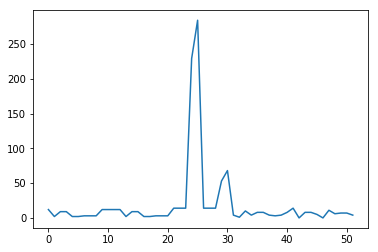

In [17]:
sStation = pd.Series(stationFeatureNumList)
print(sStation.head())
plt.plot(sStation )


In [25]:
# featureの数に偏りがある。-> Station24, 25, 29, 30　 難易度高いのか、何か情報いっぱい出してる。
x = sStation
for i in range(len(x)):
    print (np.argsort(x)[::-1][i], np.sort(x)[i])

42 0
46 0
32 1
17 2
1 2
16 2
4 2
5 2
13 2
20 3
18 3
19 3
8 3
7 3
6 3
38 3
39 4
31 4
37 4
51 4
34 4
45 5
48 6
50 7
49 7
44 8
43 8
40 8
36 8
35 8
15 9
14 9
3 9
2 9
33 10
47 11
0 12
12 12
11 12
10 12
9 12
28 14
27 14
26 14
41 14
23 14
22 14
21 14
29 53
30 68
24 229
25 284


### mada